# What is Flickr? 

Flickr is a web application for photo handling and sharing. The pictures may contain information like camera type, geo-location, among other data.  Flickr's API offers the possibility of creating apps using a vast set of images, as well as their information. It allows the user to develop intriguing apps even for deep learning.

https://www.flickr.com/services/api/

In [ ]:
!pip install flickrapi

In [ ]:
from  flickrapi import FlickrAPI

1. To Do: create an account in [Flickr](https://identity.flickr.com/sign-up) (or log in) and set a [personal key](https://www.flickr.com/services/api/keys/), then add them to the following code block:


In [ ]:
key =  #ToDo
secret = #ToDo

Let's call the Api so we can start working with it:

In [ ]:
flickr = FlickrAPI(key, secret, format='parsed-json') # calling the FlickrAPI using our keys and using json as a response format

We can make our first function to ask for the brands of cameras that Flickr knows about

In [ ]:
def get_brands(flickr):
  return flickr.cameras.getBrands()['brands']['brand']

In [ ]:
brand_cam = get_brands(flickr) # Calling the function

print('\nTotal number of brands:', len(brand_cam))
print('\nBrands:',brand_cam)

2. To Do: Get the models of each brand obtained with the last function using one of the [API Methods](https://www.flickr.com/services/api/) for 'cameras'. Your task is also  to handle the "Error: 1: Brand not found" and be able to return **all** the models available. 

In [ ]:
def get_models(brand_cam):
  models = []
  for i in range(len(brand_cam)): #
    try:
      cameras = flickr.cameras.getBrandModels(brand = brand_cam[i]['name'])['cameras']
      models.append(cameras)
    except:
      pass  
  return models

In [ ]:
#Let's try our function:
models = get_models(brand_cam)

In [ ]:
# This is the number of camera brands with specific information about their models.
print('\nAmount of brands saved: ',len(models)) 

print('\nModels known by Flickr: ',models)

#Example using the first brand of the list:
print("\nThe brand '{0}' has {1} cameras registered.".format(models[0]['brand'], len(models[0]['camera'])))



Amount of brands saved:  39

Models known by Flickr:  [{'brand': 'apple', 'camera': [{'id': 'iphone_7', 'name': {'_content': 'Apple iPhone 7'}, 'images': {'small': {'_content': 'https://live.staticflickr.com/cameras/72157635062339950_model_small_db9e4b6fea.jpg'}, 'large': {'_content': 'https://live.staticflickr.com/cameras/72157635062339950_model_large_d77764305a.jpg'}}}, {'id': 'iphone_xr', 'name': {'_content': 'Apple iPhone XR'}}, {'id': 'iphone_x', 'name': {'_content': 'Apple iPhone X'}, 'images': {'small': {'_content': 'https://live.staticflickr.com/cameras/72157688436594566_model_small_2e651054db.jpg'}, 'large': {'_content': 'https://live.staticflickr.com/cameras/72157688436594566_model_large_7aa2ca28f7.jpg'}}}, {'id': 'iphone_8_plus', 'name': {'_content': 'Apple iPhone 8 Plus'}, 'images': {'small': {'_content': 'https://live.staticflickr.com/cameras/72157688436594586_model_small_d4d6925c2d.jpg'}, 'large': {'_content': 'https://live.staticflickr.com/cameras/72157688436594586_mode

* Please go to the [documentation](https://www.flickr.com/services/api/) and read some  of the available Methods for "Photos." There, you will find a method to search photos using some keywords as text. 
* By adding filters, you can get a selection of all photos.
* The objective here is to obtain a set of 100 images from **an animal that starts with your first name initial**, e.g. `A`nt for `A`ndreas.

3. To Do: Create a function with Flickr API that finds 100 images of your animal. 

  The function should **return** the unique identifiers of each photo, i.e. the **id**, as a Python `list`.

In [ ]:
def get_photos(flickr, num=100):  
  result  = flickr.photos.search(
    text = 'ant', 
    per_page = num, # Default 100, maximum allowed: 500.
    media = 'photos', # all (default), photos or videos
    content_type = 1, #just photos (no screenshots nor 'other')
    sort = 'relevance', 
    privacy_filter = 1, #public photos
    safe_search = 1, 
    )
  
  return [item['id'] for item in result['photos']['photo']]

In [ ]:
ids = get_photos(flickr, num = 100)

In [ ]:
print('\nAmount of samples taken: ',len(ids))
print('\nIds:',ids)


Amount of samples taken:  100

Ids: ['2720988253', '33846692900', '14058217107', '14322227286', '3409453035', '18002514305', '6949923296', '3410262702', '17379925084', '3409453115', '17999309072', '17379916524', '18077280058', '5093284259', '5752450397', '14277207115', '27557509013', '26798729431', '17381991233', '18078902019', '8399625914', '24918936495', '2497848674', '2174367667', '7004683533', '15513974657', '6780534533', '31097209801', '631385974', '4600554407', '7637764334', '7118242031', '17901278979', '17469789625', '4745511779', '30064552490', '6148662403', '8640380463', '21911276996', '17469457811', '4133388486', '6845456112', '14081545307', '5245640122', '4764873976', '3189039332', '14164548586', '15665572860', '5633286910', '6222387645', '4523602106', '19039458940', '3055800506', '6938381556', '5547924308', '14596196452', '14326864623', '16863899716', '7181334694', '5009971669', '8028654404', '14458839759', '19662082218', '15362004523', '6966576776', '6216646807', '3173237

The result should look like a set of these elements:

```
ids: ['16772483993', '34534536', '1095675434122']
```

4. To Do: Create a function taking the samples obtained with the previous task and pass their obtained ids into Flickr's method to acquire the Exif information. Store the respective camera models.

  *Note: You have to avoid the **error code #2: Permission denied**, among others.*

In [ ]:
def get_Exif(ids):
  #photo_id required
  exifs = []
  for id in ids:
    try: 
      exif = flickr.photos.getExif(photo_id =id)['photo']['camera']
      exifs.append(exif)
    except: 
      pass
  return exifs

In [ ]:
#Go grab a coffee, this will take a while!
exifs = get_Exif(ids)

In [ ]:
print('\nWe have {0} cameras with Exif available'.format(len(exifs)))
print('\n',exifs)


We have 89 cameras with Exif available

 ['Sony DSC-W300', 'Sony ILCE-6300', 'Canon EOS 1100D', 'Nikon D3300', '', 'Canon EOS 7D', 'Sony SLT-A65V', '', 'Canon EOS 7D', '', 'Canon EOS 7D', 'Canon EOS 7D', 'Canon EOS 7D', 'Canon EOS Digital Rebel XT', 'Pentax K100D', 'Canon EOS 7D', '', 'Canon EOS 7D', 'Canon EOS 7D', 'Canon EOS 7D', 'Olympus STYLUS1', 'Nikon D200', 'Canon EOS 400D Digital', 'Nikon D60', 'Canon EOS 5D Mark II', 'Canon EOS 60D', 'Canon EOS 5D Mark II', 'Canon PowerShot G5', 'Sony DSC-W35', 'Fujifilm FinePix S200EXR', 'Canon PowerShot A480', 'Sony DSC-RX100M2', 'Canon EOS 7D', 'Canon EOS Digital Rebel XS', 'Nikon D7000', '', 'Sony DSC-RX100M2', 'Canon EOS 450D', 'Sony DSC-W35', 'Canon EOS 7D', 'Canon Digital IXUS 95 IS', 'Canon Digital IXUS 95 IS', 'Canon Digital IXUS 800 IS', 'Canon EOS 1000D', 'Sony DSC-W35', 'Sony DSC-W350', 'Sony DSC-W35', 'Canon EOS 7D', '', 'Sony DSC-HX300', 'Olympus TG-2', 'Nikon D7100', 'Canon EOS 5D Mark II', 'Nikon D200', '', 'Nikon D3100', 'Can

## Displaying the collected data:

Another useful Python Module is [collections](https://docs.python.org/3/library/collections.html). It allows us to work with  dictionaries, lists, sets, and tuples in a very interesting way. 

We want to know which are the most used cameras for our animal images, to do it, we can use [Counter](https://docs.python.org/3/library/collections.html#collections.Counter). This subclass of a dictionary shows how many times a key value is stored.

In [ ]:
from collections import Counter

results = dict(Counter(exifs))  # we convert the counter into a dictionary

print(results)

{'Sony DSC-W300': 1, 'Sony ILCE-6300': 1, 'Canon EOS 1100D': 1, 'Nikon D3300': 1, '': 9, 'Canon EOS 7D': 14, 'Sony SLT-A65V': 1, 'Canon EOS Digital Rebel XT': 1, 'Pentax K100D': 1, 'Olympus STYLUS1': 2, 'Nikon D200': 3, 'Canon EOS 400D Digital': 1, 'Nikon D60': 1, 'Canon EOS 5D Mark II': 3, 'Canon EOS 60D': 1, 'Canon PowerShot G5': 1, 'Sony DSC-W35': 8, 'Fujifilm FinePix S200EXR': 1, 'Canon PowerShot A480': 1, 'Sony DSC-RX100M2': 2, 'Canon EOS Digital Rebel XS': 1, 'Nikon D7000': 3, 'Canon EOS 450D': 3, 'Canon Digital IXUS 95 IS': 2, 'Canon Digital IXUS 800 IS': 1, 'Canon EOS 1000D': 1, 'Sony DSC-W350': 1, 'Sony DSC-HX300': 1, 'Olympus TG-2': 1, 'Nikon D7100': 1, 'Nikon D3100': 1, 'Canon EOS 550D': 2, 'Nikon D80': 2, 'Pentax *ist DL': 1, 'Nikon D90': 1, 'Canon EOS 50D': 1, 'Olympus FE115,X715': 1, 'Sony DSLR-A350': 1, 'Canon PowerShot SD890 IS': 1, 'Olympus C8080WZ': 1, 'Nikon Coolpix L820': 1, 'Canon PowerShot A400': 1, 'Canon EOS 5D Mark III': 2, 'Canon EOS 500D': 1, 'Olympus SZ-12':

We can use Pandas as well to search for multiple occurences:

In [ ]:
import pandas as pd

#we convert the exifs into a Pandas DataFrame:
df = pd.DataFrame(exifs) 

print(df)

                  0
0     Sony DSC-W300
1    Sony ILCE-6300
2   Canon EOS 1100D
3       Nikon D3300
4                  
..              ...
84    Olympus SZ-12
85       Nikon D70s
86      Nikon D7000
87     Sony DSC-W50
88   Canon EOS 450D

[89 rows x 1 columns]


5. To Do: Use `pandas` to find how often each unique model is occuring:


In [ ]:
mult = df.pivot_table(columns=[0], aggfunc='size') 
print (mult)

0
                               9
Canon Digital IXUS 800 IS      1
Canon Digital IXUS 95 IS       2
Canon EOS 1000D                1
Canon EOS 1100D                1
Canon EOS 400D Digital         1
Canon EOS 450D                 3
Canon EOS 500D                 1
Canon EOS 50D                  1
Canon EOS 550D                 2
Canon EOS 5D Mark II           3
Canon EOS 5D Mark III          2
Canon EOS 60D                  1
Canon EOS 7D                  14
Canon EOS Digital Rebel XS     1
Canon EOS Digital Rebel XT     1
Canon PowerShot A400           1
Canon PowerShot A480           1
Canon PowerShot G5             1
Canon PowerShot SD890 IS       1
Fujifilm FinePix S200EXR       1
Nikon Coolpix L820             1
Nikon D200                     3
Nikon D3100                    1
Nikon D3300                    1
Nikon D60                      1
Nikon D7000                    3
Nikon D70s                     1
Nikon D7100                    1
Nikon D80                      2
Nikon D9

6. To Do: Plot the results obtained using Collection/Counter as a Horizontal bar chart (only one line).

  *Note:  You may get the error unhashable type: 'dict_keys', your task is to solve it too!*

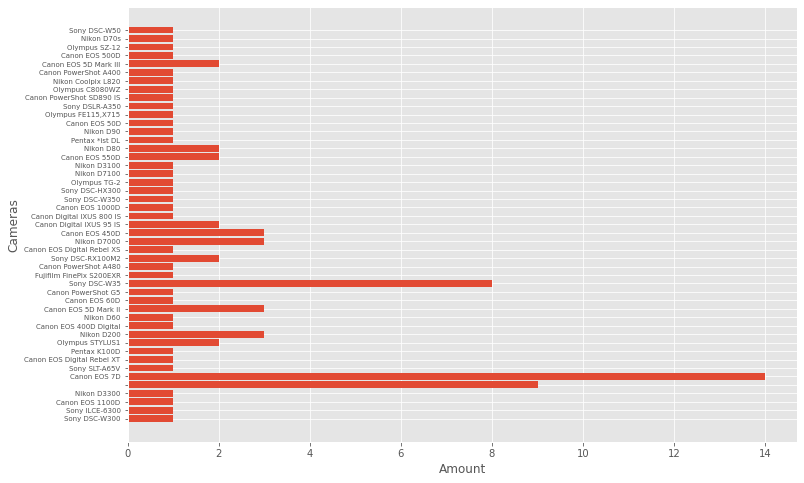

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [12, 8]
plt.style.use('ggplot')
plt.barh(list(results.keys()), list(results.values())) # We convert to list due to the error unhashable type: 'dict_keys'
plt.ylabel('Cameras')
plt.xlabel('Amount')
plt.tick_params(axis='y', which='major', labelsize=7)

And that's it! Now you can start playing with tons of information that this API can provide.